**ASD Prediction using AQ/Behavioural Questions**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Reading the Data**

In [2]:
df = pd.read_csv('autism_data.csv')
print(df.head())


   A1_Score  A2_Score  A3_Score  A4_Score  A5_Score  A6_Score  A7_Score  \
0         1         1         1         1         0         0         1   
1         1         1         0         1         0         0         0   
2         1         1         0         1         1         0         1   
3         1         1         0         1         0         0         1   
4         1         0         0         0         0         0         0   

   A8_Score  A9_Score  A10_Score  ...  gender       ethnicity jaundice autism  \
0         1         0          0  ...       f  White-European       no     no   
1         1         0          1  ...       m          Latino       no    yes   
2         1         1          1  ...       m          Latino      yes    yes   
3         1         0          1  ...       f  White-European       no    yes   
4         1         0          0  ...       f               ?       no     no   

  country_of_res used_app_before result     age_desc relation 

In [3]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704 entries, 0 to 703
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   A1_Score         704 non-null    int64  
 1   A2_Score         704 non-null    int64  
 2   A3_Score         704 non-null    int64  
 3   A4_Score         704 non-null    int64  
 4   A5_Score         704 non-null    int64  
 5   A6_Score         704 non-null    int64  
 6   A7_Score         704 non-null    int64  
 7   A8_Score         704 non-null    int64  
 8   A9_Score         704 non-null    int64  
 9   A10_Score        704 non-null    int64  
 10  age              702 non-null    float64
 11  gender           704 non-null    object 
 12  ethnicity        704 non-null    object 
 13  jaundice         704 non-null    object 
 14  autism           704 non-null    object 
 15  country_of_res   704 non-null    object 
 16  used_app_before  704 non-null    object 
 17  result          

In [4]:
df.isnull().sum()

A1_Score           0
A2_Score           0
A3_Score           0
A4_Score           0
A5_Score           0
A6_Score           0
A7_Score           0
A8_Score           0
A9_Score           0
A10_Score          0
age                2
gender             0
ethnicity          0
jaundice           0
autism             0
country_of_res     0
used_app_before    0
result             0
age_desc           0
relation           0
Class/ASD          0
dtype: int64

In [5]:
df.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jaundice', 'autism', 'country_of_res', 'used_app_before',
       'result', 'age_desc', 'relation', 'Class/ASD'],
      dtype='object')

In [6]:
df = df.replace({'YES':1, 'NO':0, '?':'Others', 'others':'Others'})
df = df.replace({'yes':1, 'no':0, '?':'Others', 'others':'Others'})
df = df.drop(columns=['autism'])
df.head()

C:\Users\Praveen\AppData\Local\Temp\ipykernel_11776\2943036690.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({'YES':1, 'NO':0, '?':'Others', 'others':'Others'})
C:\Users\Praveen\AppData\Local\Temp\ipykernel_11776\2943036690.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({'yes':1, 'no':0, '?':'Others', 'others':'Others'})


,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,country_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,26.0,f,White-European,0,United States,0,6.0,18 and more,Self,0
1,1,1,0,1,0,0,0,1,0,1,24.0,m,Latino,0,Brazil,0,5.0,18 and more,Self,0
2,1,1,0,1,1,0,1,1,1,1,27.0,m,Latino,1,Spain,0,8.0,18 and more,Parent,1
3,1,1,0,1,0,0,1,1,0,1,35.0,f,White-European,0,United States,0,6.0,18 and more,Self,0
4,1,0,0,0,0,0,0,1,0,0,40.0,f,Others,0,Egypt,0,2.0,18 and more,Others,0


In [7]:
df['gender'].replace('m',0,inplace=True)
df['gender'].replace('f',1,inplace=True)

C:\Users\Praveen\AppData\Local\Temp\ipykernel_11776\1777673975.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['gender'].replace('m',0,inplace=True)
C:\Users\Praveen\AppData\Local\Temp\ipykernel_11776\1777673975.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example

In [8]:
df

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,country_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,26.0,1,White-European,0,United States,0,6.0,18 and more,Self,0
1,1,1,0,1,0,0,0,1,0,1,24.0,0,Latino,0,Brazil,0,5.0,18 and more,Self,0
2,1,1,0,1,1,0,1,1,1,1,27.0,0,Latino,1,Spain,0,8.0,18 and more,Parent,1
3,1,1,0,1,0,0,1,1,0,1,35.0,1,White-European,0,United States,0,6.0,18 and more,Self,0
4,1,0,0,0,0,0,0,1,0,0,40.0,1,Others,0,Egypt,0,2.0,18 and more,Others,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699,0,1,0,1,1,0,1,1,1,1,25.0,1,White-European,0,Russia,0,7.0,18 and more,Self,1
700,1,0,0,0,0,0,0,1,0,1,34.0,0,Hispanic,0,Mexico,0,3.0,18 and more,Parent,0
701,1,0,1,1,1,0,1,1,0,1,24.0,1,Others,0,Russia,0,7.0,18 and more,Others,1
702,1,0,0,1,1,0,1,0,1,1,35.0,0,South Asian,0,Pakistan,0,6.0,18 and more,Self,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704 entries, 0 to 703
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   A1_Score         704 non-null    int64  
 1   A2_Score         704 non-null    int64  
 2   A3_Score         704 non-null    int64  
 3   A4_Score         704 non-null    int64  
 4   A5_Score         704 non-null    int64  
 5   A6_Score         704 non-null    int64  
 6   A7_Score         704 non-null    int64  
 7   A8_Score         704 non-null    int64  
 8   A9_Score         704 non-null    int64  
 9   A10_Score        704 non-null    int64  
 10  age              702 non-null    float64
 11  gender           704 non-null    int64  
 12  ethnicity        704 non-null    object 
 13  jaundice         704 non-null    int64  
 14  country_of_res   704 non-null    object 
 15  used_app_before  704 non-null    int64  
 16  result           704 non-null    float64
 17  age_desc        

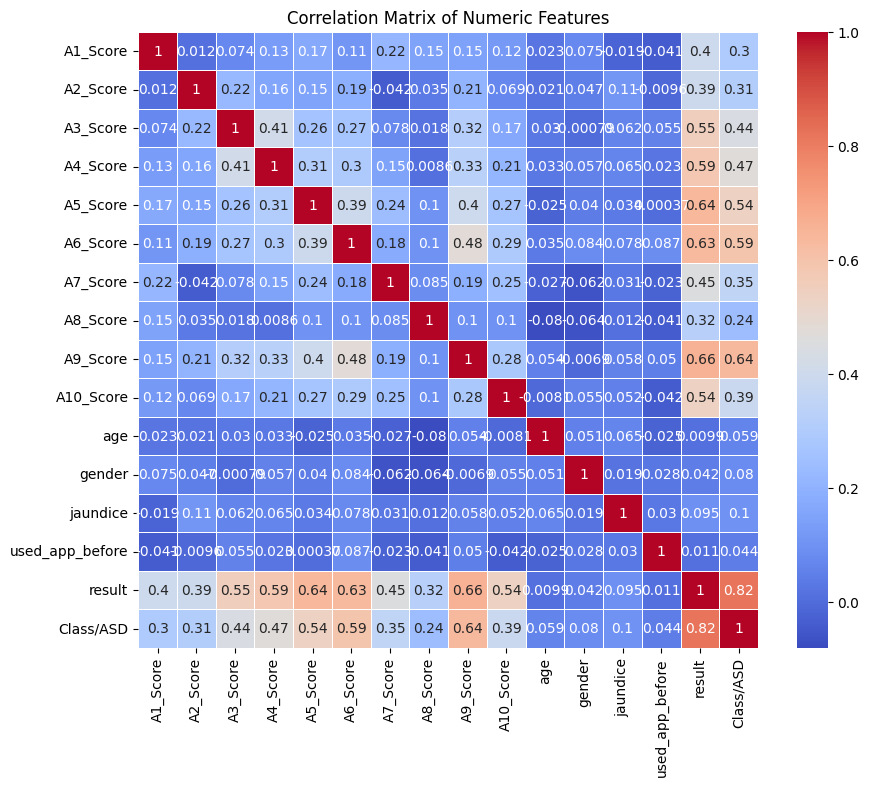

                 A1_Score  A2_Score  A3_Score  A4_Score  A5_Score  A6_Score  \
A1_Score         1.000000  0.011539  0.074096  0.127814  0.169369  0.110199   
A2_Score         0.011539  1.000000  0.223921  0.158998  0.153821  0.185864   
A3_Score         0.074096  0.223921  1.000000  0.412722  0.264927  0.268846   
A4_Score         0.127814  0.158998  0.412722  1.000000  0.306806  0.295152   
A5_Score         0.169369  0.153821  0.264927  0.306806  1.000000  0.392354   
A6_Score         0.110199  0.185864  0.268846  0.295152  0.392354  1.000000   
A7_Score         0.217538 -0.041768  0.078216  0.151236  0.238589  0.175489   
A8_Score         0.147640  0.035408  0.017771  0.008617  0.102086  0.100123   
A9_Score         0.145452  0.205421  0.315113  0.327673  0.396582  0.479422   
A10_Score        0.118413  0.068883  0.168454  0.210968  0.267561  0.294435   
age              0.023059  0.020824  0.029504  0.032539 -0.025095  0.034705   
gender           0.075011  0.047393 -0.000795  0.056

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
numeric_cols = df.select_dtypes(include=['int64', 'float64'])

correlation_matrix = numeric_cols.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Numeric Features')
plt.show()

print(correlation_matrix)

if 'Class/ASD' in numeric_cols.columns:
    correlations_with_target = correlation_matrix['Class/ASD'].sort_values(ascending=False)
    print("\nMost Prominent Features Correlated with 'Class/ASD':")
    print(correlations_with_target)
else:
    print("\n'Class/ASD' is not numeric, so correlations cannot be computed with it directly.")


**One hot Enconding**

In [11]:
df = pd.get_dummies(df, columns=['ethnicity'])
df = df.apply(lambda x: x.astype(int) if x.dtype == 'bool' else x)

print(df)

     A1_Score  A2_Score  A3_Score  A4_Score  A5_Score  A6_Score  A7_Score  \
0           1         1         1         1         0         0         1   
1           1         1         0         1         0         0         0   
2           1         1         0         1         1         0         1   
3           1         1         0         1         0         0         1   
4           1         0         0         0         0         0         0   
..        ...       ...       ...       ...       ...       ...       ...   
699         0         1         0         1         1         0         1   
700         1         0         0         0         0         0         0   
701         1         0         1         1         1         0         1   
702         1         0         0         1         1         0         1   
703         1         0         1         1         1         0         1   

     A8_Score  A9_Score  A10_Score  ...  ethnicity_Asian  ethnicity_Black  

In [12]:
df = pd.get_dummies(df, columns=['relation'])
df = df.apply(lambda x: x.astype(int) if x.dtype == 'bool' else x)

print(df)

     A1_Score  A2_Score  A3_Score  A4_Score  A5_Score  A6_Score  A7_Score  \
0           1         1         1         1         0         0         1   
1           1         1         0         1         0         0         0   
2           1         1         0         1         1         0         1   
3           1         1         0         1         0         0         1   
4           1         0         0         0         0         0         0   
..        ...       ...       ...       ...       ...       ...       ...   
699         0         1         0         1         1         0         1   
700         1         0         0         0         0         0         0   
701         1         0         1         1         1         0         1   
702         1         0         0         1         1         0         1   
703         1         0         1         1         1         0         1   

     A8_Score  A9_Score  A10_Score  ...  ethnicity_Others  ethnicity_Pasifi

In [13]:
print(df.columns)

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'jaundice', 'country_of_res', 'used_app_before', 'result', 'age_desc',
       'Class/ASD', 'ethnicity_Asian', 'ethnicity_Black', 'ethnicity_Hispanic',
       'ethnicity_Latino', 'ethnicity_Middle Eastern ', 'ethnicity_Others',
       'ethnicity_Pasifika', 'ethnicity_South Asian', 'ethnicity_Turkish',
       'ethnicity_White-European', 'relation_Health care professional',
       'relation_Others', 'relation_Parent', 'relation_Relative',
       'relation_Self'],
      dtype='object')


In [14]:
# df.drop("contry_of_res", axis=1, inplace=True)
# df.drop("ID", axis=1, inplace=True)
df.drop("age_desc",axis=1,inplace=True)

In [15]:
n = 0
for i in df['age']:
    q1 = df['age'].quantile(0.25)
    q3 = df['age'].quantile(0.75)
    iqr = q3 - q1
    upper_tail = q3 + 1.5 * iqr
    lower_tail = q1 - 1.5 * iqr

    if i > upper_tail or i < lower_tail:
           n = n+1

print('Total number of outliers in Age column: ',n)

Total number of outliers in Age column:  8


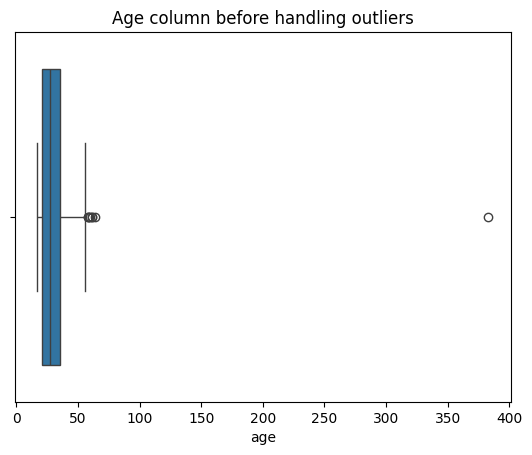

In [16]:
sns.boxplot(x='age', data= df)
plt.title('Age column before handling outliers')
plt.show()

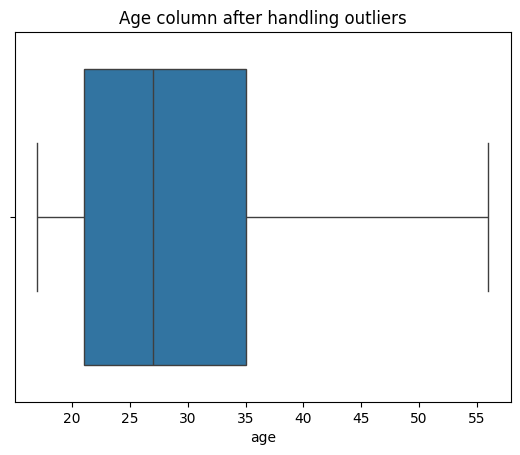

In [17]:
for i in df['age']:
    q1 = df['age'].quantile(0.25)
    q3 = df['age'].quantile(0.75)


    iqr = q3 - q1
    upper_tail = q3 + 1.5 * iqr
    lower_tail = q1 - 1.5 * iqr

    if i > upper_tail or i < lower_tail:
        if i> upper_tail:
            df['age'] = df['age'].replace(i, upper_tail)
        else:
            df['age'] = df['age'].replace(i, np.mean(i))

sns.boxplot(x='age', data=df)
plt.title('Age column after handling outliers')
plt.show()

In [18]:
df['age'] = df['age'].fillna(0) 
df=df.drop(columns=['country_of_res'])
df=df.drop(columns=['used_app_before'])
df=df.drop(columns=['result'])

In [19]:

print(df.columns)


Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'jaundice', 'Class/ASD', 'ethnicity_Asian', 'ethnicity_Black',
       'ethnicity_Hispanic', 'ethnicity_Latino', 'ethnicity_Middle Eastern ',
       'ethnicity_Others', 'ethnicity_Pasifika', 'ethnicity_South Asian',
       'ethnicity_Turkish', 'ethnicity_White-European',
       'relation_Health care professional', 'relation_Others',
       'relation_Parent', 'relation_Relative', 'relation_Self'],
      dtype='object')


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704 entries, 0 to 703
Data columns (total 29 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   A1_Score                           704 non-null    int64  
 1   A2_Score                           704 non-null    int64  
 2   A3_Score                           704 non-null    int64  
 3   A4_Score                           704 non-null    int64  
 4   A5_Score                           704 non-null    int64  
 5   A6_Score                           704 non-null    int64  
 6   A7_Score                           704 non-null    int64  
 7   A8_Score                           704 non-null    int64  
 8   A9_Score                           704 non-null    int64  
 9   A10_Score                          704 non-null    int64  
 10  age                                704 non-null    float64
 11  gender                             704 non-null    int64  

**Splitting the dataset into Train and Test**

In [21]:
from sklearn.model_selection import train_test_split

df1=df.drop(columns=['Class/ASD'])
X_train, X_test, y_train, y_test = train_test_split(
    df1, df['Class/ASD'],
    test_size=0.20,
    stratify=df['Class/ASD'],
    random_state=42
)
print(X_train.columns)
print(X_train.head(0))

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'jaundice', 'ethnicity_Asian', 'ethnicity_Black', 'ethnicity_Hispanic',
       'ethnicity_Latino', 'ethnicity_Middle Eastern ', 'ethnicity_Others',
       'ethnicity_Pasifika', 'ethnicity_South Asian', 'ethnicity_Turkish',
       'ethnicity_White-European', 'relation_Health care professional',
       'relation_Others', 'relation_Parent', 'relation_Relative',
       'relation_Self'],
      dtype='object')
Empty DataFrame
Columns: [A1_Score, A2_Score, A3_Score, A4_Score, A5_Score, A6_Score, A7_Score, A8_Score, A9_Score, A10_Score, age, gender, jaundice, ethnicity_Asian, ethnicity_Black, ethnicity_Hispanic, ethnicity_Latino, ethnicity_Middle Eastern , ethnicity_Others, ethnicity_Pasifika, ethnicity_South Asian, ethnicity_Turkish, ethnicity_White-European, relation_Health care professional, relation_Others, relation_Parent, relation_

**Splitting the Training set into training and validation**

In [22]:

X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train,
    test_size=0.20,
    random_state=42
)


X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((450, 28), (450,), (113, 28), (113,), (141, 28), (141,))

In [27]:
import torch
import torch.nn.functional as F
from torch_geometric.data import Data
from torch_geometric.nn import GCNConv
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score

X_train_tensor = torch.tensor(X_train.values, dtype=torch.float)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.long)

X_test_tensor = torch.tensor(X_test.values, dtype=torch.float)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.long)

num_nodes_train = X_train_tensor.shape[0]
num_nodes_test = X_test_tensor.shape[0]

edge_index_train = torch.tensor(np.array([[i, j] for i in range(num_nodes_train) for j in range(num_nodes_train)]).T, dtype=torch.long)
edge_index_test = torch.tensor(np.array([[i, j] for i in range(num_nodes_test) for j in range(num_nodes_test)]).T, dtype=torch.long)

data_train = Data(x=X_train_tensor, edge_index=edge_index_train, y=y_train_tensor)
data_test = Data(x=X_test_tensor, edge_index=edge_index_test, y=y_test_tensor)

class GCN(torch.nn.Module):
    def __init__(self, input_dim, hidden_dims, output_dim):
        super(GCN, self).__init__()
        self.layers = torch.nn.ModuleList()

        self.layers.append(GCNConv(input_dim, hidden_dims[0]))
        for i in range(1, len(hidden_dims)):
            self.layers.append(GCNConv(hidden_dims[i-1], hidden_dims[i]))
        self.layers.append(GCNConv(hidden_dims[-1], output_dim))

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        for layer in self.layers[:-1]: 
            x = layer(x, edge_index)
            x = F.relu(x)
        x = self.layers[-1](x, edge_index)
        return F.log_softmax(x, dim=1)

input_dim = X_train_tensor.shape[1]
hidden_dims = [16, 32] 
output_dim = len(torch.unique(y_train_tensor)) 

model = GCN(input_dim, hidden_dims, output_dim)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
loss_fn = torch.nn.CrossEntropyLoss()

def train():
    model.train()
    optimizer.zero_grad()
    out = model(data_train)
    loss = loss_fn(out, data_train.y)
    loss.backward()
    optimizer.step()
    return loss.item()

def test(data, y_true):
    model.eval()
    with torch.no_grad():
        out = model(data)
        pred = out.argmax(dim=1)
        acc = accuracy_score(y_true, pred)
    return acc

for epoch in range(100):
    loss = train()
    if epoch % 10 == 0:
        print(f'Epoch {epoch}, Loss: {loss}')

test_acc = test(data_test, y_test_tensor)
print(f'Test Accuracy: {test_acc}')


Epoch 0, Loss: 0.6042775511741638
Epoch 10, Loss: 0.5823500752449036
Epoch 20, Loss: 0.5805936455726624
Epoch 30, Loss: 0.5817122459411621
Epoch 40, Loss: 0.581264317035675
Epoch 50, Loss: 0.5804925560951233
Epoch 60, Loss: 0.5800900459289551
Epoch 70, Loss: 0.5799388885498047
Epoch 80, Loss: 0.5799160599708557
Epoch 90, Loss: 0.5799258351325989
Test Accuracy: 0.7304964539007093


**Model Training**

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
import joblib

**logistic regression**

In [24]:
param_grid = {
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'saga'],
    'max_iter': [100, 200, 300],
    'penalty': ['l2'],
    'C': [0.01, 0.1, 1, 10, 100]
}

lg = LogisticRegression(random_state=42)

grid_search = GridSearchCV(estimator=lg, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=0)
grid_search.fit(X_train, y_train)

results = grid_search.cv_results_
for mean_score, params in zip(results['mean_test_score'], results['params']):
    print(f"Score: {mean_score:.4f}, Parameters: {params}")

best_params = grid_search.best_params_
print("Best Parameters:", best_params)

best_lg = grid_search.best_estimator_
joblib.dump(best_lg,"../../Models/AQ10/lgmodel.joblib")
pred_val = best_lg.predict(X_val)
val_accuracy = accuracy_score(y_val, pred_val)
f1 = f1_score(y_val, pred_val)
conf_matrix_val = confusion_matrix(y_val, pred_val)

print('Validation Accuracy: ', val_accuracy)
print('F1-score: ', f1)
print('Validation Confusion Matrix:\n', conf_matrix_val)

pred_test = best_lg.predict(X_test)
test_accuracy = accuracy_score(y_test, pred_test)
conf_matrix_test = confusion_matrix(y_test, pred_test)

print('Test Accuracy: ', test_accuracy)
print('Test Confusion Matrix:\n', conf_matrix_test)

Score: 0.8044, Parameters: {'C': 0.01, 'max_iter': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
Score: 0.8044, Parameters: {'C': 0.01, 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
Score: 0.8089, Parameters: {'C': 0.01, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}
Score: 0.8022, Parameters: {'C': 0.01, 'max_iter': 100, 'penalty': 'l2', 'solver': 'saga'}
Score: 0.8044, Parameters: {'C': 0.01, 'max_iter': 200, 'penalty': 'l2', 'solver': 'newton-cg'}
Score: 0.8044, Parameters: {'C': 0.01, 'max_iter': 200, 'penalty': 'l2', 'solver': 'lbfgs'}
Score: 0.8089, Parameters: {'C': 0.01, 'max_iter': 200, 'penalty': 'l2', 'solver': 'liblinear'}
Score: 0.7956, Parameters: {'C': 0.01, 'max_iter': 200, 'penalty': 'l2', 'solver': 'saga'}
Score: 0.8044, Parameters: {'C': 0.01, 'max_iter': 300, 'penalty': 'l2', 'solver': 'newton-cg'}
Score: 0.8044, Parameters: {'C': 0.01, 'max_iter': 300, 'penalty': 'l2', 'solver': 'lbfgs'}
Score: 0.8089, Parameters: {'C': 0.01, 'max_iter': 300, 'penal

**Random Forest**

In [25]:
rf = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': ['balanced', None],
    'ccp_alpha': [0.0, 0.01, 0.05, 0.1]
}
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=0)
grid_search.fit(X_train, y_train)

print("All Results:")
means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']
params = grid_search.cv_results_['params']

for mean, std, param in zip(means, stds, params):
    print(f"Accuracy: {mean:.4f} (std: {std:.4f}) with parameters: {param}")

print("\nBest parameters found: ", grid_search.best_params_)
print("Best cross-validation accuracy: ", grid_search.best_score_)

best_rf = grid_search.best_estimator_
joblib.dump(best_rf,"../../Models/AQ10/rfmodel.joblib")
pred_val = best_rf.predict(X_val)
val_accuracy = accuracy_score(y_val, pred_val)
conf_matrix_val = confusion_matrix(y_val, pred_val)

print('\nValidation Accuracy: ', val_accuracy)
print('Validation Confusion Matrix:\n', conf_matrix_val)

pred_test = best_rf.predict(X_test)
test_accuracy = accuracy_score(y_test, pred_test)
conf_matrix_test = confusion_matrix(y_test, pred_test)

print('\nTest Accuracy: ', test_accuracy)
print('Test Confusion Matrix:\n', conf_matrix_test)


All Results:
Accuracy: 0.9600 (std: 0.0151) with parameters: {'ccp_alpha': 0.0, 'class_weight': 'balanced', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 10}
Accuracy: 0.9600 (std: 0.0259) with parameters: {'ccp_alpha': 0.0, 'class_weight': 'balanced', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Accuracy: 0.9644 (std: 0.0247) with parameters: {'ccp_alpha': 0.0, 'class_weight': 'balanced', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy: 0.9444 (std: 0.0199) with parameters: {'ccp_alpha': 0.0, 'class_weight': 'balanced', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 10}
Accuracy: 0.9533 (std: 0.0178) with parameters: {'ccp_alpha': 0.0, 'class_weight': 'balanced', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}
Accuracy: 0.9578 (std: 0.0237) with parameters: {'ccp_alpha': 0.0, 'class_weight'

In [26]:
import pandas as pd

new_data = {
    'A1_Score': [1],
    'A2_Score': [0],
    'A3_Score': [0],
    'A4_Score': [1],
    'A5_Score': [0],
    'A6_Score': [0],
    'A7_Score': [0],
    'A8_Score': [1],
    'A9_Score': [0],
    'A10_Score': [0],
    'age': [22.5],
    'gender': [1],  # Assuming 1 for male and 0 for female
    'jaundice': [0],
    'ethnicity_Asian': [0],
    'ethnicity_Black': [0],
    'ethnicity_Hispanic': [1],  # Assuming the child is Hispanic
    'ethnicity_Latino': [0],
    'ethnicity_Middle Eastern ': [0],
    'ethnicity_Others': [0],
    'ethnicity_Pasifika': [0],
    'ethnicity_South Asian': [0],
    'ethnicity_Turkish': [0],
    'ethnicity_White-European': [0],
    'relation_Health care professional': [0],
    'relation_Others': [0],
    'relation_Parent': [1],  # Assuming the child’s relation is Parent
    'relation_Relative': [0],
    'relation_Self': [0]
}

new_df = pd.DataFrame(new_data)
prediction = best_rf.predict(new_df)

is_autistic = "Yes" if prediction[0] == 1 else "No"
print(f"Is the child autistic? {is_autistic}")
pred_prob = best_rf.predict_proba(new_df)
print(pred_prob)



Is the child autistic? No
[[0.96784524 0.03215476]]


**Support Vector Classifier(SVC)**

In [27]:
param_grid = {
    'C': [0.1, 0.45, 1, 10],
    'gamma': [0.001, 0.01, 0.07, 0.1],
    'kernel': ['rbf', 'linear', 'poly', 'sigmoid']
}

svc = SVC()

grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, 
                           cv=5, scoring='accuracy', n_jobs=-1)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best Parameters:", best_params)

best_svc = grid_search.best_estimator_
joblib.dump(best_svc,"../../Models/AQ10/svmmodel.joblib")
results = grid_search.cv_results_
for mean_score, params in zip(results['mean_test_score'], results['params']):
    print(f"Score: {mean_score:.4f}, Parameters: {params}")

train_accuracy = best_svc.score(X_train, y_train)
print('Training Accuracy with best parameters: ', train_accuracy)


Best Parameters: {'C': 10, 'gamma': 0.001, 'kernel': 'linear'}
Score: 0.7333, Parameters: {'C': 0.1, 'gamma': 0.001, 'kernel': 'rbf'}
Score: 0.9689, Parameters: {'C': 0.1, 'gamma': 0.001, 'kernel': 'linear'}
Score: 0.7333, Parameters: {'C': 0.1, 'gamma': 0.001, 'kernel': 'poly'}
Score: 0.7333, Parameters: {'C': 0.1, 'gamma': 0.001, 'kernel': 'sigmoid'}
Score: 0.7333, Parameters: {'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}
Score: 0.9689, Parameters: {'C': 0.1, 'gamma': 0.01, 'kernel': 'linear'}
Score: 0.9489, Parameters: {'C': 0.1, 'gamma': 0.01, 'kernel': 'poly'}
Score: 0.7333, Parameters: {'C': 0.1, 'gamma': 0.01, 'kernel': 'sigmoid'}
Score: 0.7333, Parameters: {'C': 0.1, 'gamma': 0.07, 'kernel': 'rbf'}
Score: 0.9689, Parameters: {'C': 0.1, 'gamma': 0.07, 'kernel': 'linear'}
Score: 0.9489, Parameters: {'C': 0.1, 'gamma': 0.07, 'kernel': 'poly'}
Score: 0.7333, Parameters: {'C': 0.1, 'gamma': 0.07, 'kernel': 'sigmoid'}
Score: 0.7333, Parameters: {'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}


In [28]:
pred = best_svc.predict(X_val)

val_accuracy = accuracy_score(y_val, pred)
f1 = f1_score(y_val, pred)
conf_matrix = confusion_matrix(y_val, pred)

print('Validation Accuracy: ', val_accuracy)
print('F1-score: ', f1)
print('Confusion Matrix:\n', conf_matrix)

Validation Accuracy:  1.0
F1-score:  1.0
Confusion Matrix:
 [[82  0]
 [ 0 31]]


In [29]:
pred_test = best_svc.predict(X_test)
test_accuracy = accuracy_score(y_test, pred_test)
f1_test = f1_score(y_test, pred_test)
conf_matrix_test = confusion_matrix(y_test, pred_test)

print('Test Accuracy: ', test_accuracy)
print('Test F1-score: ', f1_test)
print('Test Confusion Matrix:\n', conf_matrix_test)

Test Accuracy:  1.0
Test F1-score:  1.0
Test Confusion Matrix:
 [[103   0]
 [  0  38]]


**KNN**

In [30]:
param_grid = {
    'n_neighbors': [3, 4, 5, 6, 7],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}
knn = KNeighborsClassifier()

grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, 
                           cv=5, scoring='accuracy', n_jobs=-1)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best Parameters:", best_params)

best_knn = grid_search.best_estimator_
joblib.dump(best_knn,"../../Models/AQ10/knnmodel.joblib")
results = grid_search.cv_results_
for mean_score, params in zip(results['mean_test_score'], results['params']):
    print(f"Score: {mean_score:.4f}, Parameters: {params}")

joblib.dump(best_knn, 'best_knn_model.pkl')

train_accuracy = best_knn.score(X_train, y_train)
print('Training Accuracy with best parameters: ', train_accuracy)


Best Parameters: {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}
Score: 0.9089, Parameters: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}
Score: 0.9111, Parameters: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
Score: 0.9022, Parameters: {'metric': 'euclidean', 'n_neighbors': 4, 'weights': 'uniform'}
Score: 0.9111, Parameters: {'metric': 'euclidean', 'n_neighbors': 4, 'weights': 'distance'}
Score: 0.9067, Parameters: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'}
Score: 0.9067, Parameters: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'}
Score: 0.9111, Parameters: {'metric': 'euclidean', 'n_neighbors': 6, 'weights': 'uniform'}
Score: 0.9156, Parameters: {'metric': 'euclidean', 'n_neighbors': 6, 'weights': 'distance'}
Score: 0.9000, Parameters: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'uniform'}
Score: 0.9022, Parameters: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'distance'}
Sco

In [31]:
pred = best_knn.predict(X_val)

val_accuracy = accuracy_score(y_val, pred)
acc = accuracy_score(y_val, pred)
conf_matrix = confusion_matrix(y_val, pred)

print('Validation Accuracy: ', val_accuracy)
print('Accuracy-score: ', acc)
print('Confusion Matrix:\n', conf_matrix)


Validation Accuracy:  0.911504424778761
Accuracy-score:  0.911504424778761
Confusion Matrix:
 [[77  5]
 [ 5 26]]


In [32]:
pred_test = best_knn.predict(X_test)

test_accuracy = accuracy_score(y_test, pred_test)
test_conf_matrix = confusion_matrix(y_test, pred_test)

print('Test Accuracy: ', test_accuracy)
print('Test Confusion Matrix:\n', test_conf_matrix)

Test Accuracy:  0.8936170212765957
Test Confusion Matrix:
 [[100   3]
 [ 12  26]]


**Artificial Neural Network**

In [31]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras import initializers
from sklearn.metrics import confusion_matrix

In [39]:


# Modified neural network with more layers and dropout
ann = models.Sequential([
    layers.Dense(128, input_shape=(X_train.shape[1],), activation='relu', kernel_initializer='he_normal'),
    layers.Dropout(0.4),  # Increased dropout rate
    layers.Dense(64, activation='relu', kernel_initializer='he_normal'),
    layers.Dropout(0.3),  # Additional dropout for regularization
    # layers.Dense(32, activation='relu', kernel_initializer='he_normal'),
    # layers.Dropout(0.3),
    # layers.Dense(16, activation='relu', kernel_initializer='he_normal'),
    # layers.Dropout(0.2),  # Dropout to reduce overfitting in smaller layers
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Save the model if needed
ann.save("../../Models/AQ10/ann.h5")

# Training the model
history = ann.fit(X_train, y_train, epochs=76, validation_data=(X_val, y_val))

# Prediction and evaluation
pred = ann.predict(X_val)
pred = np.where(pred < 0.50, 0, 1)

print('Accuracy using Neural Network: ', accuracy_score(y_val, pred))
print('Confusion Matrix using Neural Network:\n', confusion_matrix(y_val, pred))


c:\Users\Praveen\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/76
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.4853 - loss: 3.8354 - val_accuracy: 0.7257 - val_loss: 2.6439
Epoch 2/76
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6647 - loss: 2.3725 - val_accuracy: 0.7257 - val_loss: 0.7993
Epoch 3/76
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5823 - loss: 1.8937 - val_accuracy: 0.7257 - val_loss: 1.1343
Epoch 4/76
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6309 - loss: 1.6335 - val_accuracy: 0.7257 - val_loss: 1.3101
Epoch 5/76
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6486 - loss: 1.4393 - val_accuracy: 0.7257 - val_loss: 0.6360
Epoch 6/76
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5791 - loss: 1.4004 - val_accuracy: 0.7257 - val_loss: 0.8236
Epoch 7/76
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6578 - loss: 1.2504 - val_accuracy: 0.7257 - val_loss: 0.5883
Epoch 8/76
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6413 - loss: 1.0679 - val_accuracy: 0.7257 - val_loss

**Normal Weight Initialization**

In [34]:
ann = models.Sequential([
    layers.Dense(64, input_shape=(X_train.shape[1],), activation='relu', kernel_initializer='normal'),
    layers.Dropout(0.3),
    layers.Dense(32, activation='relu', kernel_initializer='normal'),
    layers.Dropout(0.2),
    layers.Dense(1, activation='sigmoid')
])

ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
ann.save("../../Models/AQ10/ann.h5")
history = ann.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val))

pred = ann.predict(X_val)
pred = np.where(pred < 0.50, 0, 1)

print('Accuracy using Neural Network: ', accuracy_score(y_val, pred))
print('Confusion Matrix using Neural Network:\n', confusion_matrix(y_val, pred))

c:\Users\Praveen\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.6347 - loss: 0.6621 - val_accuracy: 0.7257 - val_loss: 0.6102
Epoch 2/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7157 - loss: 0.6132 - val_accuracy: 0.7257 - val_loss: 0.5958
Epoch 3/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7215 - loss: 0.5814 - val_accuracy: 0.7257 - val_loss: 0.5821
Epoch 4/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7410 - loss: 0.5568 - val_accuracy: 0.7257 - val_loss: 0.5649
Epoch 5/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7055 - loss: 0.5666 - val_accuracy: 0.7257 - val_loss: 0.5382
Epoch 6/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7456 - loss: 0.5054 - val_accuracy: 0.7434 - val_loss: 0.5003
Epoch 7/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7910 - loss: 0.4764 - val_accuracy: 0.7876 - val_loss: 0.4560
Epoch 8/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7830 - loss: 0.4610 - val_accuracy: 0.8584 - val_loss

**He Weight Initialization**

In [32]:


ann = models.Sequential([
    layers.Dense(64, input_shape=(X_train.shape[1],), activation='relu', kernel_initializer=initializers.HeNormal()),
    layers.Dropout(0.3),
    layers.Dense(32, activation='relu', kernel_initializer=initializers.HeNormal()),
    layers.Dropout(0.2),
    layers.Dense(1, activation='sigmoid', kernel_initializer=initializers.GlorotNormal())  # Xavier for sigmoid
])

ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
ann.save("../../Models/AQ10/ann.h5")
history = ann.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val))

pred = ann.predict(X_val)
pred = np.where(pred < 0.50, 0, 1)

print('Accuracy using Neural Network: ', accuracy_score(y_val, pred))
print('Confusion Matrix using Neural Network:\n', confusion_matrix(y_val, pred))


c:\Users\Praveen\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6113 - loss: 2.3389 - val_accuracy: 0.7257 - val_loss: 0.9142
Epoch 2/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5913 - loss: 1.7730 - val_accuracy: 0.7257 - val_loss: 0.9245
Epoch 3/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6124 - loss: 1.7829 - val_accuracy: 0.7257 - val_loss: 0.8001
Epoch 4/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6049 - loss: 1.4586 - val_accuracy: 0.7257 - val_loss: 0.7209
Epoch 5/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6470 - loss: 1.0743 - val_accuracy: 0.7257 - val_loss: 0.5996
Epoch 6/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6486 - loss: 1.0444 - val_accuracy: 0.7257 - val_loss: 0.6006
Epoch 7/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7092 - loss: 0.9072 - val_accuracy: 0.7965 - val_loss: 0.5036
Epoch 8/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6753 - loss: 0.8154 - val_accuracy: 0.7611 - val_loss

**Xavier Initialization**

In [33]:
ann = models.Sequential([
    layers.Dense(64, input_shape=(X_train.shape[1],), activation='relu', kernel_initializer=initializers.GlorotNormal()),  # Xavier
    layers.Dropout(0.3),
    layers.Dense(32, activation='relu', kernel_initializer=initializers.GlorotNormal()),
    layers.Dropout(0.2),
    layers.Dense(1, activation='sigmoid', kernel_initializer=initializers.GlorotNormal())  # Xavier for sigmoid
])

ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
ann.save("../../Models/AQ10/ann.h5")
history = ann.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val))

pred = ann.predict(X_val)
pred = np.where(pred < 0.50, 0, 1)

print('Accuracy using Neural Network: ', accuracy_score(y_val, pred))
print('Confusion Matrix using Neural Network:\n', confusion_matrix(y_val, pred))


c:\Users\Praveen\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7170 - loss: 1.2118 - val_accuracy: 0.7257 - val_loss: 0.5941
Epoch 2/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6634 - loss: 0.9416 - val_accuracy: 0.7257 - val_loss: 0.6160
Epoch 3/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6559 - loss: 0.8459 - val_accuracy: 0.7257 - val_loss: 0.5883
Epoch 4/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6455 - loss: 0.7806 - val_accuracy: 0.7434 - val_loss: 0.5436
Epoch 5/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6866 - loss: 0.7428 - val_accuracy: 0.7257 - val_loss: 0.5832
Epoch 6/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6986 - loss: 0.7489 - val_accuracy: 0.7434 - val_loss: 0.5295
Epoch 7/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7054 - loss: 0.6330 - val_accuracy: 0.7434 - val_loss: 0.5148
Epoch 8/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7024 - loss: 0.6185 - val_accuracy: 0.7611 - val_loss

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/stepWARNING:tensorflow:6 out of the last 12 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x000001F6FA026980> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Accuracy using Neural Network:  0.911504424778761
Confusion Matrix using Neural Network:
 [[77  5]
 [ 5 26]]


In [35]:
pred_test = ann.predict(X_test)
pred_test = np.where(pred_test < 0.50, 0, 1)

test_accuracy = accuracy_score(y_test, pred_test)
test_f1 = f1_score(y_test, pred_test)
test_conf_matrix = confusion_matrix(y_test, pred_test)

print('Test Accuracy using Neural Network: ', test_accuracy)
print('Test F1-Score using Neural Network: ', test_f1)
print('Test Confusion Matrix using Neural Network:\n', test_conf_matrix)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Test Accuracy using Neural Network:  0.9361702127659575
Test F1-Score using Neural Network:  0.8732394366197183
Test Confusion Matrix using Neural Network:
 [[101   2]
 [  7  31]]


In [36]:
val_accuracy = accuracy_score(y_val, pred)
print('Validation Accuracy: ', val_accuracy)

Validation Accuracy:  0.9557522123893806


**Decision Tree**

Training Accuracy:  0.9333333333333333
Validation Accuracy:  0.9026548672566371
F1-score:  0.7924528301886793
Confusion Matrix:
 [[81  1]
 [10 21]]


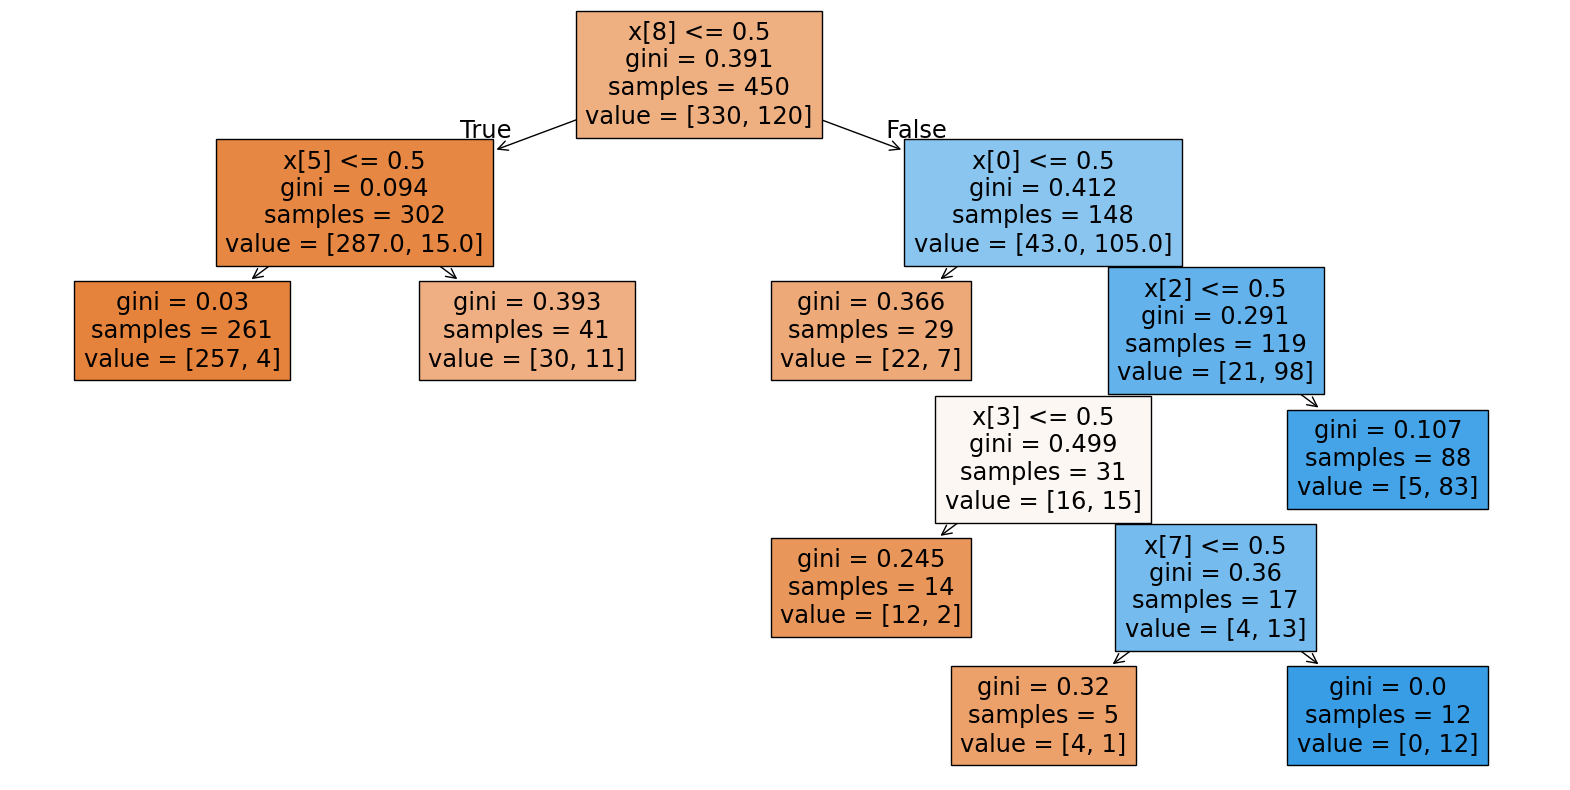

Number of nodes in last tree is: 1 with ccp_alpha: 0.19217011713700446


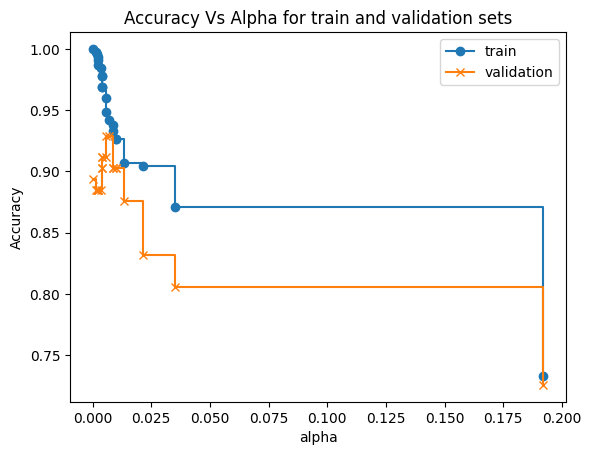

Training Accuracy:  0.9688888888888889
Validation Accuracy:  0.911504424778761
F1 Score:  0.8333333333333334
Confusion Matrix:
 [[78  4]
 [ 6 25]]


In [37]:
dt = DecisionTreeClassifier(criterion='gini', splitter='best', ccp_alpha=0.01, random_state=42)
dt.fit(X_train, y_train)

pred = dt.predict(X_val)

print('Training Accuracy: ', dt.score(X_train, y_train))
print('Validation Accuracy: ', accuracy_score(y_val, pred))
print('F1-score: ', f1_score(y_val, pred))
print('Confusion Matrix:\n', confusion_matrix(y_val, pred))

plt.figure(figsize=(20,10))
tree.plot_tree(dt, filled=True)
plt.show()

path = dt.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

dts = []

for ccp in ccp_alphas:
    dt = DecisionTreeClassifier(ccp_alpha=ccp, random_state=42)
    dt.fit(X_train, y_train)
    dts.append(dt)

print(f'Number of nodes in last tree is: {dts[-1].tree_.node_count} with ccp_alpha: {ccp_alphas[-1]}')

train_scores = [dt.score(X_train, y_train) for dt in dts]
val_scores = [dt.score(X_val, y_val) for dt in dts]

fig, ax = plt.subplots()
ax.set_xlabel('alpha')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy Vs Alpha for train and validation sets')
ax.plot(ccp_alphas, train_scores, marker='o', label='train', drawstyle='steps-post')
ax.plot(ccp_alphas, val_scores, marker='x', label='validation', drawstyle='steps-post')
ax.legend()
plt.show()

optimal_alpha = 0.005
dt = DecisionTreeClassifier(ccp_alpha=optimal_alpha, random_state=42)
dt.fit(X_train, y_train)
joblib.dump(dt,"../../Models/AQ10/dtmodel.joblib")
print('Training Accuracy: ', dt.score(X_train, y_train))
print('Validation Accuracy: ', dt.score(X_val, y_val))
pred = dt.predict(X_val)
print('F1 Score: ', f1_score(y_val, pred))
print('Confusion Matrix:\n', confusion_matrix(y_val, pred))


In [38]:
test_pred_dt = dt.predict(X_test)
print('Accuracy Score: ', accuracy_score(y_test,test_pred_dt))
print('Confusion Matrix:\n', confusion_matrix(y_test, test_pred_dt))

Accuracy Score:  0.8581560283687943
Confusion Matrix:
 [[97  6]
 [14 24]]


**Extra Trees Classifier**

In [39]:
ext = ExtraTreesClassifier(max_depth=5, min_samples_split=2, min_samples_leaf=5,
                           random_state=42, criterion='entropy')
ext.fit(X_train, y_train)

train_accuracy = ext.score(X_train, y_train)
print('Training Accuracy: ', train_accuracy)
joblib.dump(ext,"../../Models/AQ10/extmodel.joblib")
pred = ext.predict(X_val)

val_accuracy = accuracy_score(y_val, pred)
f1 = f1_score(y_val, pred)
conf_matrix = confusion_matrix(y_val, pred)

print('Validation Accuracy: ', val_accuracy)
print('F1-score: ', f1)
print('Confusion Matrix:\n', conf_matrix)


Training Accuracy:  0.9822222222222222
Validation Accuracy:  0.9292035398230089
F1-score:  0.8518518518518519
Confusion Matrix:
 [[82  0]
 [ 8 23]]


**Prediction**

In [40]:
# pred_test = ext.predict(X_test)
# try:
#   id_col = df_test[['id_col']]
# except:
#   id_col = pd.DataFrame({'id': range(1, len(X_test) + 1)})

# output = pd.DataFrame(id_col)
# output['Class/ASD'] = pred_test

# print(output)

# output.to_csv('test_class.csv', index=False)
pred_val = ext.predict(X_val)

print('Validation Accuracy: ', accuracy_score(y_val, pred_val))
print('F1-score: ', f1_score(y_val, pred_val))
print('Confusion Matrix:\n', confusion_matrix(y_val, pred_val))

Validation Accuracy:  0.9292035398230089
F1-score:  0.8518518518518519
Confusion Matrix:
 [[82  0]
 [ 8 23]]


In [41]:
pred_val = ext.predict(X_val)
validation_accuracy = accuracy_score(y_val, pred_val)
print('Validation Accuracy: ', validation_accuracy)

Validation Accuracy:  0.9292035398230089


In [42]:
pred_test = ext.predict(X_test)
test_accuracy = accuracy_score(y_test, pred_test)
print('Test Accuracy: ', test_accuracy)

Test Accuracy:  0.9148936170212766
